In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import (
    LabelEncoder,
    MinMaxScaler,
    StandardScaler,
    OneHotEncoder
    )
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    )
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, f1_score,
    r2_score, ConfusionMatrixDisplay,
    classification_report, RocCurveDisplay,
    mean_absolute_error, mean_squared_error
    )
from sklearn.utils import resample

In [3]:
df_train_raw = pd.read_csv("../data/train.csv")
df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [4]:
df_test_raw = pd.read_csv("../data/test.csv")
df_test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172585 entries, 0 to 172584
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      172585 non-null  int64  
 1   road_type               172585 non-null  object 
 2   num_lanes               172585 non-null  int64  
 3   curvature               172585 non-null  float64
 4   speed_limit             172585 non-null  int64  
 5   lighting                172585 non-null  object 
 6   weather                 172585 non-null  object 
 7   road_signs_present      172585 non-null  bool   
 8   public_road             172585 non-null  bool   
 9   time_of_day             172585 non-null  object 
 10  holiday                 172585 non-null  bool   
 11  school_season           172585 non-null  bool   
 12  num_reported_accidents  172585 non-null  int64  
dtypes: bool(4), float64(1), int64(4), object(4)
memory usage: 12.5+ MB


In [5]:
df_train_raw.sample(10,random_state=2025)

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
165375,165375,urban,3,0.09,70,daylight,rainy,False,True,morning,True,True,0,0.32
392201,392201,urban,4,0.36,45,daylight,rainy,True,True,morning,True,True,0,0.19
274078,274078,rural,1,0.84,70,night,clear,False,False,afternoon,True,True,1,0.47
168365,168365,urban,2,0.95,60,dim,rainy,False,True,afternoon,True,True,2,0.63
365878,365878,highway,2,0.80,70,night,clear,False,False,morning,True,True,0,0.68
432257,432257,urban,4,0.57,70,daylight,foggy,True,True,evening,True,False,3,0.49
166869,166869,urban,4,0.70,70,dim,foggy,True,False,morning,True,True,3,0.61
98755,98755,urban,4,0.89,45,dim,clear,True,False,evening,True,False,1,0.30
99463,99463,rural,4,0.71,25,daylight,rainy,False,False,morning,True,True,1,0.27
318443,318443,urban,2,0.70,45,daylight,clear,True,True,morning,False,False,0,0.17


In [6]:
df_baking_train = df_train_raw.copy()
df_baking_train = df_baking_train.drop(columns=["id"])
df_baking_train["road_type"] = df_baking_train["road_type"].astype("category")
df_baking_train["lighting"] = df_baking_train["lighting"].astype("category")
df_baking_train["weather"] = df_baking_train["weather"].astype("category")
df_baking_train["road_signs_present"] = df_baking_train["road_signs_present"].astype("category")
df_baking_train["public_road"] = df_baking_train["public_road"].astype("category")
df_baking_train["time_of_day"] = df_baking_train["time_of_day"].astype("category")
df_baking_train["holiday"] = df_baking_train["holiday"].astype("category")
df_baking_train["school_season"] = df_baking_train["school_season"].astype("category")
df_train = df_baking_train.copy()
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   road_type               517754 non-null  category
 1   num_lanes               517754 non-null  int64   
 2   curvature               517754 non-null  float64 
 3   speed_limit             517754 non-null  int64   
 4   lighting                517754 non-null  category
 5   weather                 517754 non-null  category
 6   road_signs_present      517754 non-null  category
 7   public_road             517754 non-null  category
 8   time_of_day             517754 non-null  category
 9   holiday                 517754 non-null  category
 10  school_season           517754 non-null  category
 11  num_reported_accidents  517754 non-null  int64   
 12  accident_risk           517754 non-null  float64 
dtypes: category(8), float64(2), int64(3)
memory usage: 23.7 MB


In [7]:
df_baking_test = df_test_raw.copy()
df_baking_test= df_baking_test.drop(columns=["id"])
df_baking_test["road_type"] = df_baking_test["road_type"].astype("category")
df_baking_test["lighting"] = df_baking_test["lighting"].astype("category")
df_baking_test["weather"] = df_baking_test["weather"].astype("category")
df_baking_test["road_signs_present"] = df_baking_test["road_signs_present"].astype("category")
df_baking_test["public_road"] = df_baking_test["public_road"].astype("category")
df_baking_test["time_of_day"] = df_baking_test["time_of_day"].astype("category")
df_baking_test["holiday"] = df_baking_test["holiday"].astype("category")
df_baking_test["school_season"] = df_baking_test["school_season"].astype("category")
df_test = df_baking_test.copy()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172585 entries, 0 to 172584
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   road_type               172585 non-null  category
 1   num_lanes               172585 non-null  int64   
 2   curvature               172585 non-null  float64 
 3   speed_limit             172585 non-null  int64   
 4   lighting                172585 non-null  category
 5   weather                 172585 non-null  category
 6   road_signs_present      172585 non-null  category
 7   public_road             172585 non-null  category
 8   time_of_day             172585 non-null  category
 9   holiday                 172585 non-null  category
 10  school_season           172585 non-null  category
 11  num_reported_accidents  172585 non-null  int64   
dtypes: category(8), float64(1), int64(3)
memory usage: 6.6 MB


In [8]:
df_train, df_val = train_test_split(df_train,test_size=0.2,random_state=2025)

In [9]:
display(df_train.describe(include="number").T)
display(df_train.describe(include="category").T)

,count,mean,std,min,25%,50%,75%,max
num_lanes,414203.0,2.491447,1.120379,1.0,1.00,2.00,3.00,4.0
curvature,414203.0,0.489026,0.272674,0.0,0.26,0.51,0.71,1.0
speed_limit,414203.0,46.108152,15.786392,25.0,35.00,45.00,60.00,70.0
num_reported_accidents,414203.0,1.187186,0.896531,0.0,1.00,1.00,2.00,7.0
accident_risk,414203.0,0.352352,0.166524,0.0,0.23,0.34,0.46,1.0


,count,unique,top,freq
road_type,414203,3,highway,139067
lighting,414203,3,dim,146967
weather,414203,3,foggy,145105
road_signs_present,414203,2,False,207484
public_road,414203,2,True,208114
time_of_day,414203,3,morning,138754
holiday,414203,2,True,208516
school_season,414203,2,False,208024


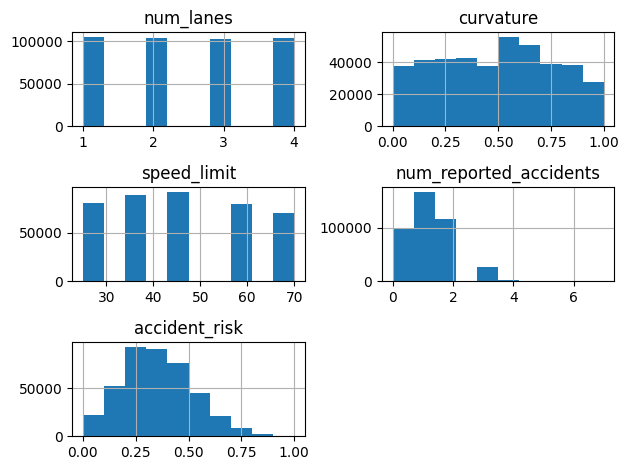

In [10]:
df_train.hist()
plt.tight_layout()
plt.show()

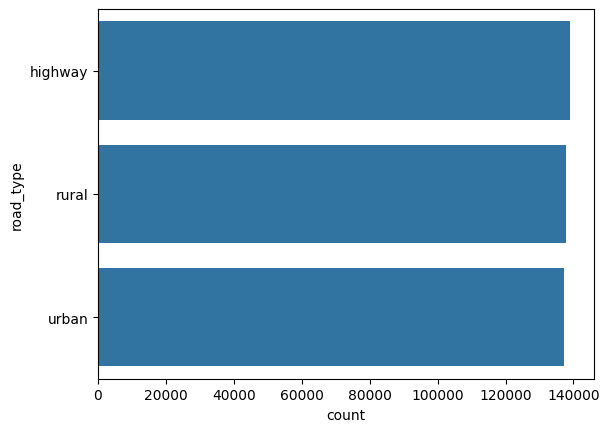

In [11]:
sns.countplot(df_train, y="road_type")
plt.show()

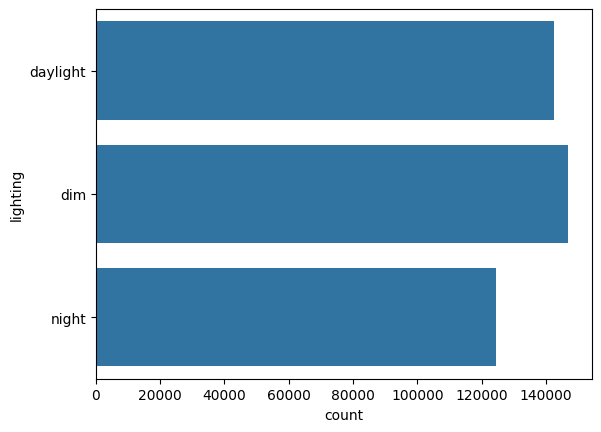

In [12]:
sns.countplot(df_train, y="lighting")
plt.show()

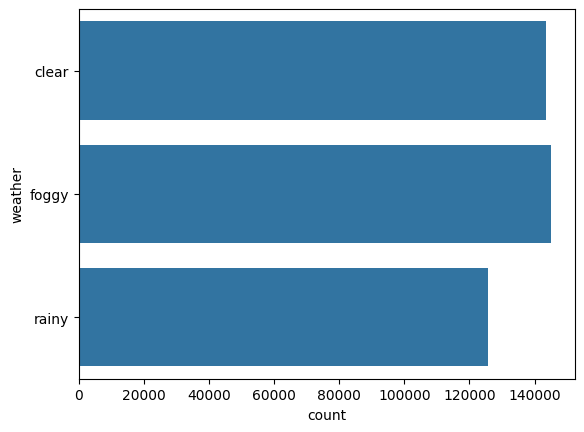

In [13]:
sns.countplot(df_train, y="weather")
plt.show()

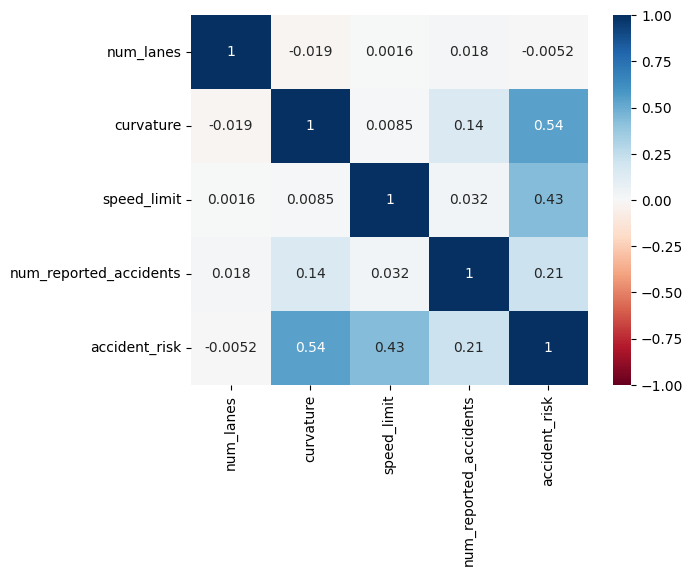

In [14]:
sns.heatmap(data= df_train.select_dtypes("number").corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True) #Solo funciona con variables numericas
plt.show()

In [15]:
X_train = df_train.drop(columns=["accident_risk"])
y_train = df_train["accident_risk"]
X_val = df_val.drop(columns=["accident_risk"])
y_val = df_val["accident_risk"]

In [ ]:


num_cols = X_train.select_dtypes('number').columns
cat_cols = X_train.select_dtypes('category').columns

num_proc = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])
cat_proc = Pipeline(steps=[
    ('onehot',OneHotEncoder(drop='first'))
])
processor = ColumnTransformer(transformers=[
    ('num',num_proc,num_cols),
    ('cat',cat_proc,cat_cols)
])
     

tree = Pipeline(steps=[
    ('proc', processor),
    ('tree', DecisionTreeRegressor(max_depth=6,
                                    random_state=2025))
])

lr = Pipeline(steps=[
    ('proc', processor),
    ('lreg', LinearRegression())
])

rf = Pipeline(steps=[
    ('proc', processor),
    ('rf', RandomForestRegressor(random_state=2025))
])

knn = Pipeline(steps=[
    ('proc', processor),
    ('hb', KNeighborsRegressor())
])

gb = Pipeline(steps=[
    ('proc', processor),
    ('nb', GradientBoostingRegressor(random_state=2025))
])
     


: 

In [ ]:

models = [
  (lr,"Linear Regresion"),
  (tree,'Decission Tree'),
  (rf,'Random forest'),
  (gb,'Gradient Boosting'),
  (knn,'KNeighbors')]

performance = {}

for est, name in models:
  est.fit(X_train, y_train)
  y_hat = est.predict(X_val)
  r2 = round(r2_score(y_val,y_hat),2)
  rmse = round(np.sqrt(mean_squared_error(y_val, y_hat)),2)
  mae = round(mean_absolute_error(y_val, y_hat),2)

  performance[name] = {
      'R2 Score':r2,
      'RMSE':rmse,
      'MAE':mae,
  }
     

df_models = pd.DataFrame(performance)
df_models.T
     


Gradient boosting es levemente mejor

In [ ]:
y_pred = gb.predict(df_test)

In [ ]:
df_pred = pd.DataFrame(columns=['id','accident_risk'])
df_pred["id"] = df_test_raw['id']
df_pred["accident_risk"] = y_pred

NameError: name 'pd' is not defined